In [106]:
import glob
import json
import os
import sys
import re
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from common import *

In [107]:
log_scale = {
    'T0',
    'T1'
    'protrusion_cost_coefficient0',
    'protrusion_cost_coefficient1',
    'deformation_cost_coefficient',
    'dislikes_cost_coefficient',
}

In [126]:
def get_pid(path):
    return int(re.sub(r'(\d+)\.pose\.json', r'\1', os.path.basename(path)))
    
def load_results(solution_dir):
    paths = []
    for f in os.listdir(solution_dir):
        if f.endswith('.pose.json'):
            paths.append(os.path.join(solution_dir, f))
    print(f'found {len(paths)} files')
    
    rows = []
    for path in paths:
        with open(path) as fi:
            j = json.load(fi)
        row = {
            'problem_id': get_pid(path),
            'solver': j['meta']['solver'],
        }
        for key, value in j['meta']['parameters'].items():
            row['p.' + key] = value
        rows.append(row)
    df = pd.DataFrame(rows)
    return df

def analyze(df):
    solvers = df.solver.unique()
    params = [c for c in df.columns if c.startswith('p.')]
    print(solvers)
    print(params)
    
    for solver in solvers:
        cols = 3
        rows = (len(params) + cols - 1) // cols
        fig, ax = plt.subplots(rows, cols, figsize=(4 * cols, 2 * rows))
        ax = ax.ravel()
        sub_df = df[df.solver == solver]
        
        for iparam, p in enumerate(params):
            data = sub_df[p].values.astype(np.float64)
            param_name = p.replace('p.', '')
            is_log = param_name in log_scale
            try:
                sns.distplot(data, ax=ax[iparam], rug=True, hist=True, label='UW')
            except:
                sns.distplot(data, ax=ax[iparam], rug=True, hist=True, label='UW', kde_kws={'bw':0.1})
            if is_log:
                ax[iparam].set_title(param_name + ' (log)')
                ax[iparam].set_xscale('log')
            else:
                ax[iparam].set_title(param_name)
    
        fig.tight_layout()
        fig.subplots_adjust(top=0.95)
        fig.suptitle(solver)
        plt.show()

In [127]:
df = load_results(r'..\solutions\OptunaAnnealingSolver')
df

found 88 files


,problem_id,solver,p.T0,p.T1,p.deformation_cost_coefficient,p.dislikes_cost_coefficient,p.flip_probability,p.hop_grid_probability,p.initialize_pose_by_hole,p.prohibit_unfeasible_after_feasible,...,p.protrusion_cost_coefficient1,p.shift_max_delta,p.shift_probability,p.single_small_change_max_delta,p.single_small_change_probability,p.slide_protrusion_max_delta,p.slide_protrusion_probability,p.slight_rotate_max_deg,p.slight_rotate_probability,p.vote_pow
0,1,OptunaAnnealingSolver,1.321280,0.015131,32.652018,0.007908,0.962704,0.826569,0,0,...,0.001108,2,0.611136,2,0.344438,1.936584,0.237180,4.042200,0.969678,4.633395
1,10,OptunaAnnealingSolver,4.305281,0.054775,7.773778,0.083214,0.234677,0.538170,0,0,...,0.012417,1,0.874184,1,0.751535,2.865793,0.340263,1.916847,0.067411,3.133056
2,100,OptunaAnnealingSolver,2.778957,0.005694,56.559889,0.001155,0.026542,0.982876,0,0,...,0.003347,2,0.864746,2,0.420923,2.811758,0.477288,4.333475,0.065251,3.269576
3,101,OptunaAnnealingSolver,2.800577,0.006269,9.932973,0.000664,0.052765,0.698464,0,0,...,0.045250,3,0.487376,3,0.853230,1.698302,0.552644,3.213128,0.517176,4.851312
4,102,OptunaAnnealingSolver,1.656830,0.001190,15.807852,0.000120,0.531868,0.648345,0,0,...,0.012660,3,0.058712,1,0.845468,1.237689,0.039884,4.995502,0.973198,3.415600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,95,OptunaAnnealingSolver,1.150482,0.005245,3.642870,0.002084,0.998347,0.146825,0,0,...,0.028936,1,0.747350,2,0.784015,1.172825,0.974575,1.248523,0.532665,3.812201
84,96,OptunaAnnealingSolver,11.529216,0.012320,6.524097,0.001710,0.147462,0.030060,0,0,...,0.006580,1,0.807606,1,0.717970,2.958027,0.496749,3.516825,0.116420,4.638408
85,97,OptunaAnnealingSolver,4.426683,0.001422,26.402948,0.000001,0.593550,0.411394,0,0,...,0.028410,3,0.263001,3,0.408679,2.604570,0.700705,1.807394,0.069358,3.636800
86,98,OptunaAnnealingSolver,3.800468,0.017161,55.111035,0.001659,0.676633,0.019390,0,0,...,0.046762,2,0.975933,3,0.650295,1.127762,0.241089,4.393767,0.878077,4.880911


['OptunaAnnealingSolver']
['p.T0', 'p.T1', 'p.deformation_cost_coefficient', 'p.dislikes_cost_coefficient', 'p.flip_probability', 'p.hop_grid_probability', 'p.initialize_pose_by_hole', 'p.prohibit_unfeasible_after_feasible', 'p.protrusion_cost_coefficient0', 'p.protrusion_cost_coefficient1', 'p.shift_max_delta', 'p.shift_probability', 'p.single_small_change_max_delta', 'p.single_small_change_probability', 'p.slide_protrusion_max_delta', 'p.slide_protrusion_probability', 'p.slight_rotate_max_deg', 'p.slight_rotate_probability', 'p.vote_pow']


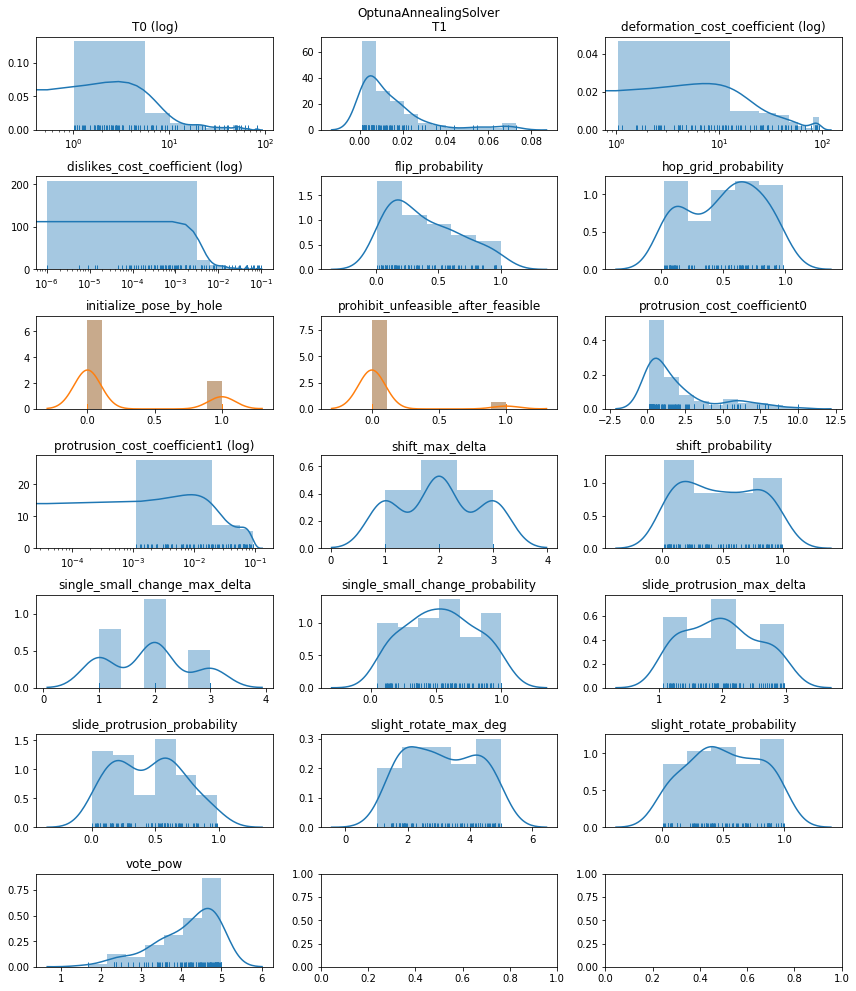

In [128]:
analyze(df)